In [1]:
import pandas as pd  

In [2]:
df = pd.read_csv("Apple_data.csv")  
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320435,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635286,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637506,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968960,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889904,237458000,0.0,0.0


In [3]:
# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320435,212818400,0.0,0.0
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635286,257142000,0.0,0.0
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637506,263188400,0.0,0.0
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968960,160423600,0.0,0.0
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889904,237458000,0.0,0.0


In [5]:
data = df[['Close']]

In [21]:
data.head()

,Close
Date,
2015-01-02 00:00:00-05:00,27.332500
2015-01-05 00:00:00-05:00,26.562500
2015-01-06 00:00:00-05:00,26.565001
2015-01-07 00:00:00-05:00,26.937500
2015-01-08 00:00:00-05:00,27.972500


In [6]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Close    0
dtype: int64


In [7]:
import matplotlib.pyplot as plt

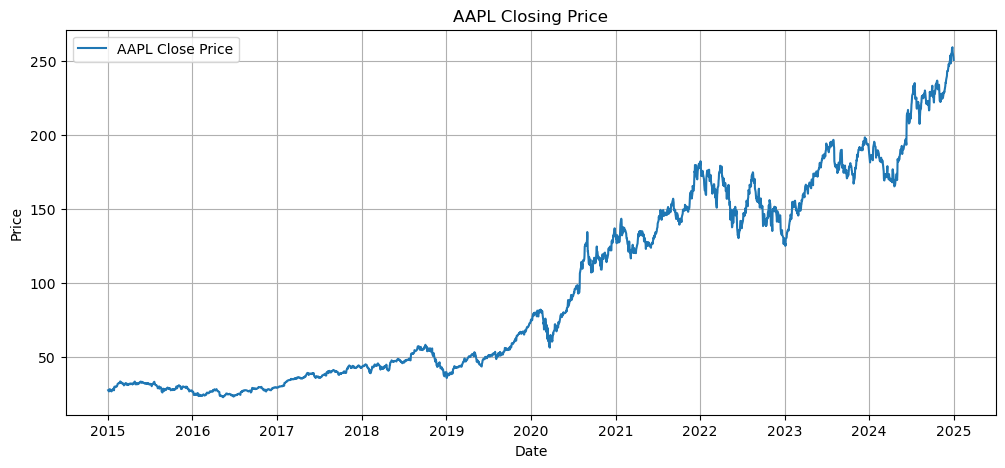

In [8]:
# Plot the closing prices
plt.figure(figsize=(12, 5))
plt.plot(data, label='AAPL Close Price')
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
split_index = int(len(data) * 0.8)
train = data.iloc[:split_index]
test = data.iloc[split_index:]
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (2012, 1)
Test shape: (504, 1)


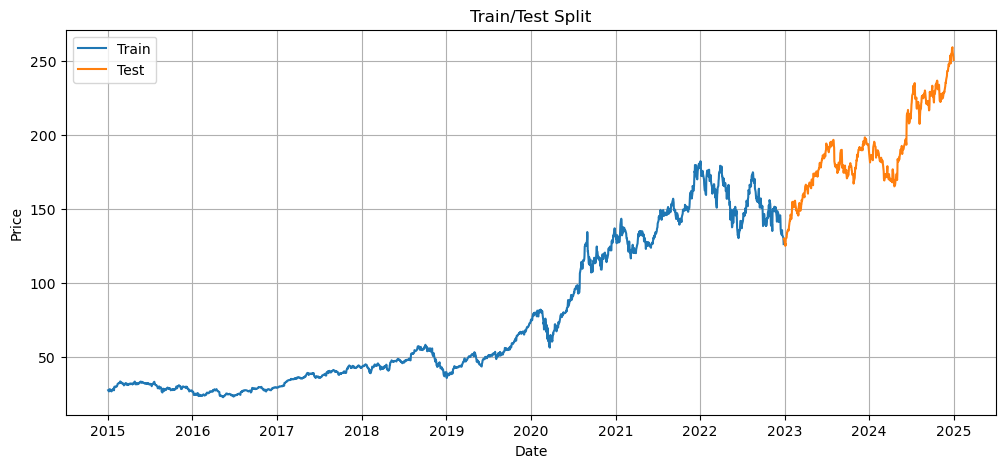

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on training data
result = adfuller(train['Close'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -0.7221179864347376
p-value: 0.8409370017466231
Critical Value (1%): -3.4336386745240652
Critical Value (5%): -2.8629927557359443
Critical Value (10%): -2.5675433856598793


In [12]:
# First-order differencing
train_diff = train['Close'].diff().dropna()

# ADF test on differenced data
result_diff = adfuller(train_diff)

print("ADF Statistic (differenced):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic (differenced): -9.119995028094099
p-value: 3.224527732398468e-15
Critical Value (1%): -3.4336386745240652
Critical Value (5%): -2.8629927557359443
Critical Value (10%): -2.5675433856598793


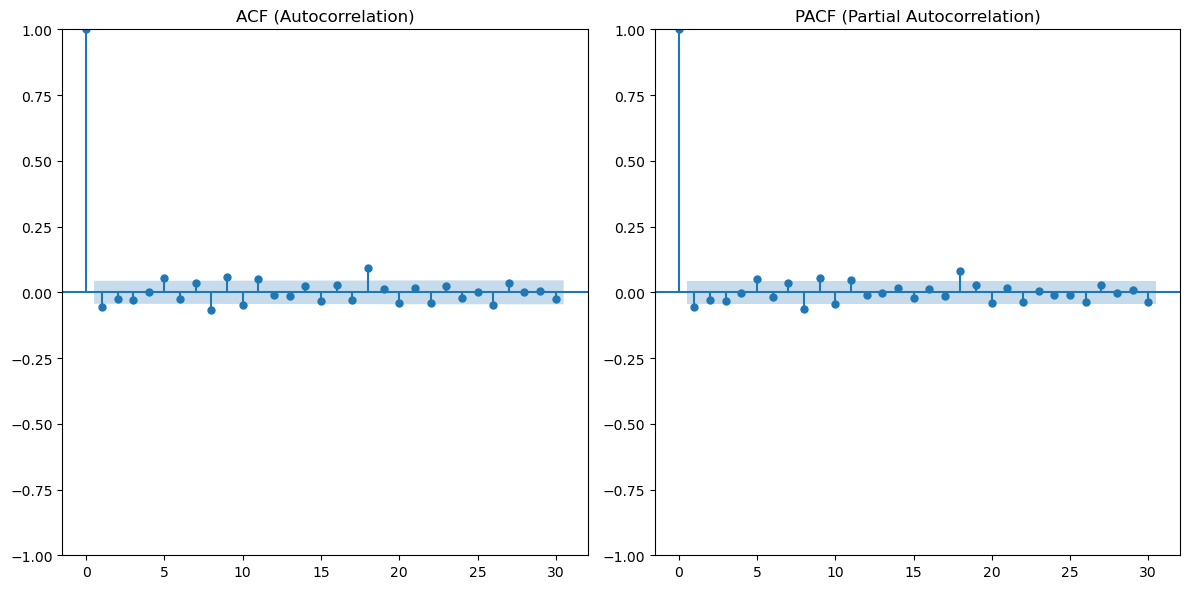

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for differenced training data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_acf(train_diff, ax=axes[0], lags=30)
axes[0].set_title('ACF (Autocorrelation)')

plot_pacf(train_diff, ax=axes[1], lags=30, method='ywm')
axes[1].set_title('PACF (Partial Autocorrelation)')

plt.tight_layout()
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Close'], order=(1, 1, 1))  # p=1, d=1, q=1
model_fit = model.fit()

/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2012
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4007.829
Date:                Wed, 26 Mar 2025   AIC                           8021.657
Time:                        22:42:27   BIC                           8038.476
Sample:                             0   HQIC                          8027.831
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3997      0.167      2.392      0.017       0.072       0.727
ma.L1         -0.4577      0.164     -2.799      0.005      -0.778      -0.137
sigma2         3.1520      0.047     66.546      0.0

In [17]:
forecast = model_fit.forecast(steps=len(test))

print(forecast.head())

2012    126.337012
2013    126.455717
2014    126.503159
2015    126.522121
2016    126.529699
Name: predicted_mean, dtype: float64


/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


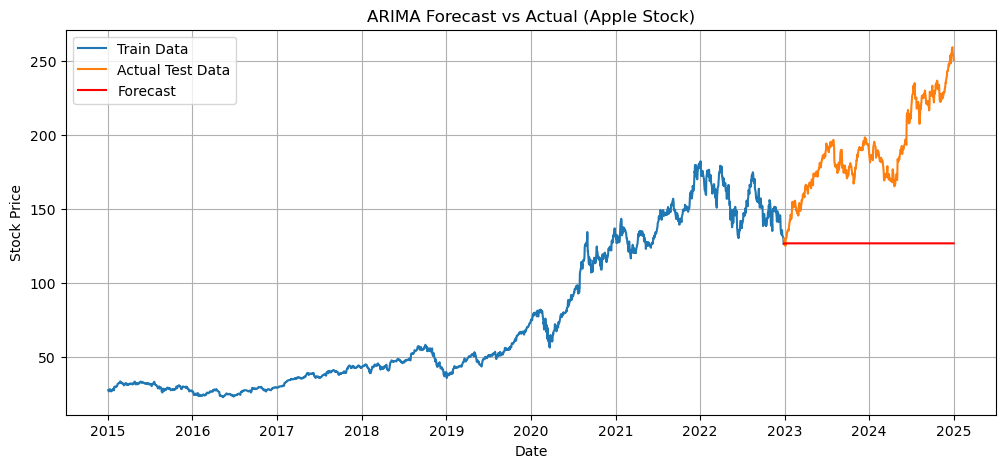

In [18]:
# Կանխատեսումը ճիշտ ինդեքսով դնել
forecast.index = test.index  # փոխարինում ենք թվային ինդեքսը օրացուցայինով

# Գծապատկեր
plt.figure(figsize=(12, 5))
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Actual Test Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Apple Stock)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Հաշվել MAE և RMSE
mae = mean_absolute_error(test['Close'], forecast)
rmse = np.sqrt(mean_squared_error(test['Close'], forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 63.185929522361945
Root Mean Squared Error (RMSE): 69.1124726436086
